In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.coordinates import AltAz
from astropy.coordinates import ICRS
from scipy.optimize import curve_fit
import struct
%matplotlib inline

In [3]:
#Load data
CasA_raw = np.fromfile('AST326_ARO_CasA_calibration.dat')

In [4]:
#Name variables accordint to lab manual
nf = CasA_raw[0].astype(np.int32) #The first number in the array, number of frequency channels
nt = CasA_raw[1].astype(np.int32) #The second number in the array, number of time slices
ns = CasA_raw[2].astype(np.int32) #The third number in the array, size of each time slice
lf = CasA_raw[3:1027] #The fourth number to the length of nf, list of frequencies
lf_flipped = np.flip(lf,axis=0) #Frequencies are in reverse order so flip

In [5]:
#Real data begins after number 1027, all of the rest is header
CasA_data = CasA_raw[1027:]

#Slice the data into the time slices
CasA_slices = CasA_data.reshape(-1, 1027)
timestamp_CasA = CasA_slices[:,0] #In MJD
alt_CasA_ARO = CasA_slices[:,1] #altitude pointing of ARO
az_CasA_ARO = CasA_slices[:,2] #azimuth pointing of ARO
StokesI_CasA_data = CasA_slices[:, 3:1027] #Stokes I samples for each frequency, in order
StokesI_CasA_ARO = np.flip(StokesI_CasA_data, axis=1)

In [6]:
#Band that the ARO covers
print(lf_flipped)#These are backwards, so flip all the data

[4.00390625e+08 4.00781250e+08 4.01171875e+08 ... 7.99218750e+08
 7.99609375e+08 8.00000000e+08]


In [7]:
#Convert from AltAz to RADec
ARO_pos = EarthLocation(lat = '45d57m19.8s', lon = '281d55m37s', height = (260.4*u.m))
times = Time(timestamp_CasA, format = 'mjd') #Puts time into correct format
radec_coord = []
for n in range(len(times)):
    current_orient = SkyCoord(alt = alt_CasA_ARO[n]*u.deg, az = az_CasA_ARO[n]*u.deg, frame = 'altaz', obstime = times[n], location = ARO_pos)
    current_orient_radec = current_orient.transform_to('icrs')
    radec_coord.append(current_orient_radec)

In [8]:
#AltAz coordinates
AltAz_CasA_ARO = np.stack((alt_CasA_ARO, az_CasA_ARO), axis=-1)
print(AltAz_CasA_ARO)

[[ 16.488 337.747]
 [ 16.477 337.775]
 [ 16.938 337.863]
 [ 16.944 337.89 ]
 [ 17.021 337.929]
 [ 17.372 337.978]
 [ 17.383 337.984]
 [ 17.828 338.077]
 [ 17.828 338.077]
 [ 18.267 338.181]
 [ 18.278 338.181]
 [ 18.718 338.264]
 [ 18.723 338.286]
 [ 19.162 338.374]
 [ 19.168 338.401]
 [ 19.118 338.445]
 [ 19.102 338.473]
 [ 19.568 338.555]
 [ 19.574 338.577]
 [ 20.002 338.682]
 [ 20.007 338.682]
 [ 20.183 338.764]
 [ 20.446 338.808]
 [ 20.446 338.803]
 [ 20.567 338.863]
 [ 20.88  338.929]
 [ 20.88  338.923]
 [ 21.324 339.05 ]
 [ 21.324 339.039]
 [ 21.324 339.05 ]
 [ 21.752 339.193]
 [ 21.752 339.176]
 [ 21.791 339.198]
 [ 22.191 339.303]
 [ 22.191 339.297]
 [ 22.635 339.407]
 [ 22.635 339.407]
 [ 22.635 339.407]
 [ 23.074 339.55 ]
 [ 23.074 339.534]
 [ 23.08  339.534]
 [ 23.513 339.665]
 [ 23.513 339.654]
 [ 23.518 339.654]
 [ 23.952 339.792]
 [ 23.952 339.775]
 [ 24.023 339.814]
 [ 24.396 339.907]
 [ 24.396 339.896]]


In [9]:
print(radec_coord)
CasA_RA, CasA_Dec = np.loadtxt('ARO-CasA_RA_Dec_coord.txt', comments = '#', skiprows = 2, unpack = True)

[<SkyCoord (ICRS): (ra, dec) in deg
    (347.08706771, 55.09003341)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.17436607, 55.09262105)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.50152324, 55.5402946)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.54970221, 55.55758057)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.63807541, 55.64307853)>, <SkyCoord (ICRS): (ra, dec) in deg
    (347.94098838, 55.97546014)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.04010828, 55.98783688)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.35824588, 56.42241576)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.48224423, 56.4223862)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.78655693, 56.85601522)>, <SkyCoord (ICRS): (ra, dec) in deg
    (348.90736394, 56.86567507)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.25101554, 57.29008008)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.35420712, 57.30440164)>, <SkyCoord (ICRS): (ra, dec) in deg
    (349.6937485, 57.72954465)>, <SkyCoord (ICRS): (ra, dec) in deg
 

In [10]:
CasA_tt = times.tt
print(CasA_tt) #Check astropy function to convert to real time

[57970.69925461 57970.6996372  57970.69986917 57970.70010155
 57970.70033359 57970.70057126 57970.7008461  57970.70107804
 57970.70142237 57970.70165999 57970.70196897 57970.70220647
 57970.70257485 57970.70280671 57970.7030386  57970.70327042
 57970.70362959 57970.70386149 57970.70427432 57970.70450626
 57970.70474042 57970.70497701 57970.70520913 57970.70544407
 57970.70567664 57970.70590862 57970.70628911 57970.70652115
 57970.70675312 57970.70707716 57970.70730904 57970.70754271
 57970.70777808 57970.70801002 57970.70837495 57970.70860693
 57970.70883891 57970.70909661 57970.70932859 57970.70956045
 57970.70979229 57970.71002409 57970.71025825 57970.71049091
 57970.71072288 57970.71095785 57970.71119057 57970.71142277
 57970.71166036]


<SkyCoord (ICRS): (ra, dec) in deg
    (350.85833333, 58.8)>


Text(0.5,0,'Coordinate Offset (Degrees)')

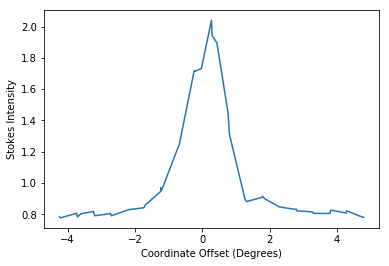

In [11]:
#Plot intensity for each frequency band
Stokes_1 = StokesI_CasA_ARO[:,0]
Stokes_mean1 = np.mean(Stokes_1)
Stokes_sigma1 = np.std(Stokes_1)
#print(Stokes_mean1)
#print(Stokes_sigma1)
#plt.plot(Stokes_1)

#Source offset - Cas A is at (24, 58) RA-Dec? - which one to use (I think Dec but don't know why/if this is a good choice)
#RA_offset = CasA_RA - 350.85833333
#dec_offset = CasA_Dec - 58.8
#print(RA_offset)
#print(dec_offset)
#plt.figure()
#plt.plot(RA_offset, Stokes_1)
#plt.figure()
#plt.plot(dec_offset, Stokes_1)

CasA = SkyCoord(ra='23h23m26s', dec = '58°48′')
#The Above converts to (ra, dec) in deg (350.85833333, 58.8)>
print(CasA)
offset_list = []
for n in range(len(radec_coord)):
    offset = CasA.separation(radec_coord[n])
    offset_list.append(offset.value)

#Change to not absolute value
offset_neg = np.negative(offset_list[0:22]).tolist()
offset_list_final = offset_list[22:]
for i in range(len(offset_neg)):
    offset_list_final.append(offset_neg[i])
    
offset_sorted = np.sort(offset_list_final)
offset_array = np.array(offset_sorted)

plt.plot(offset_array, Stokes_1)
plt.ylabel('Stokes Intensity')
plt.xlabel('Coordinate Offset (Degrees)')

#plt.figure()
#Stokes_10 = StokesI_CasA_ARO[:,11]
#plt.plot(offset_array, Stokes_10)
#plt.ylabel('Stokes Intensity')
#plt.xlabel('Coordinate Offset (Degrees)')

#Plot intenstity as a function of source offset
#plt.plot(CasA_offset, Stokes_1)
#plt.ylabel('Stokes Intensity')
#plt.xlabel('Coordinate Offset (Degrees)')

Text(0,0.5,'Power in Sub-band (arb units)')

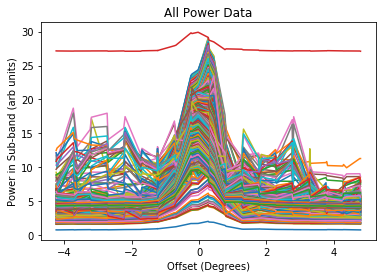

In [12]:
plt.plot(offset_array, StokesI_CasA_ARO)
plt.title('All Power Data')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Power in Sub-band (arb units)')

Text(0,0.5,'Power (arb units)')

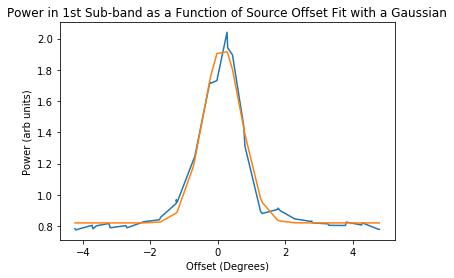

In [13]:
#Gaussian function
def Gaussian(x,sigma,mu,c,d): #x = data, sigma = standard deviation, mu = mean, c = scaling factor, d = vertical shift
    return c*(np.e**((-(x - mu)**2)/(2*(sigma**2))))+d

error = np.full((49,), 0.01) #Create error data

mu1 = np.mean(offset_array)
sigma1 = np.std(offset_array)

p_opt, p_cov = curve_fit(Gaussian, offset_array, Stokes_1, p0=(sigma1, mu1, 1, 30))#, sigma=error, absolute_sigma=True)
p_opt_test = p_opt
p_cov_test = p_cov
plt.plot(offset_array, Stokes_1)
plt.plot(offset_array, Gaussian(offset_array,*p_opt_test))
plt.title('Power in 1st Sub-band as a Function of Source Offset Fit with a Gaussian')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Power (arb units)')

Text(0.5,1,'Theoretical Beamwidth Curve')

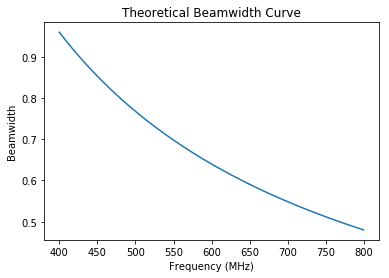

In [14]:
#Theoretical beamwidth
c = 3*(10**8) #speed of light
wavelength = np.zeros(len(lf_flipped))
for i in range(0, len(lf_flipped)):
    wavelength[i] = c/lf_flipped[i]
FWHM_theory = np.zeros(len(lf_flipped))
for i in range(0, len(wavelength)):
    FWHM_theory[i] = (1.028*wavelength[i]/46)*(180/np.pi) #convert from rad to degrees


freq_axis = np.arange(400,800,(400/1024))

plt.plot(freq_axis, FWHM_theory)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Beamwidth')
plt.title('Theoretical Beamwidth Curve')
#plt.savefig('theory_beam.png')

Text(0,0.5,'Off-Source Power')

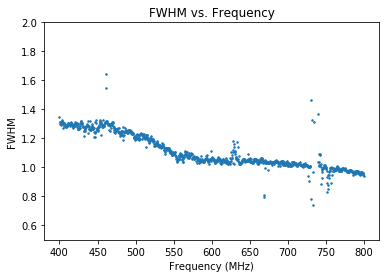

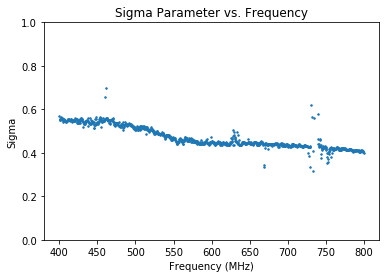

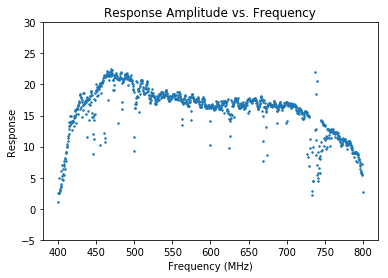

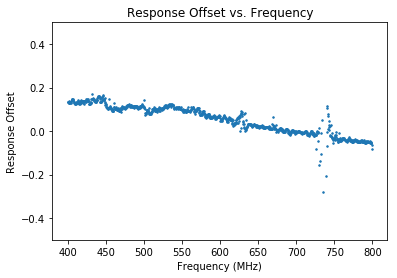

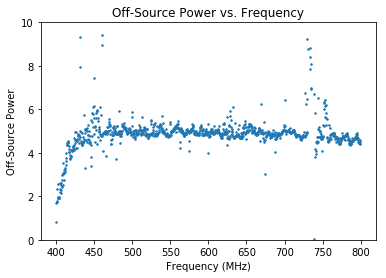

In [15]:
#Keith's fits - use this, but why are they backwards?
def gauss(x,*p):
    A, mu, sigma, base = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))+base

p0 = [20,0,1,5]
amp = np.zeros(nf)
bw = np.zeros(nf)
pt = np.zeros(nf)
base = np.zeros(nf)
for i in range(0,1024):
    p_opt_all, p_cov_all = curve_fit(gauss, offset_array, StokesI_CasA_ARO[:,i], p0=p0) 
    amp[i] = p_opt_all[0]
    pt[i] = p_opt_all[1]
    bw[i] = p_opt_all[2]
    base[i] = p_opt_all[3]

freq_axis = np.arange(400,800,(400/1024))

FWHM_exp = 2.355*bw #This is the formula in the lab manual for FWHM for a Gaussian, but it moves the function up
plt.plot(freq_axis, FWHM_exp, ls='',marker='o',markersize=1.5)
plt.ylim(0.5,2)
plt.title('FWHM vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('FWHM')
#plt.savefig('FWHM.png')

plt.figure()
plt.plot(freq_axis, bw, ls='', marker='o', markersize=1.5) #Just the plot of the sigma parameter
plt.ylim(0,1)
plt.title('Sigma Parameter vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Sigma')
#plt.savefig('sigma.png')

plt.figure()
plt.plot(freq_axis, amp, ls='', marker='o', markersize=1.5)
plt.ylim(-5,30)
plt.title('Response Amplitude vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Response')

plt.figure()
plt.plot(freq_axis, pt, ls='', marker='o', markersize=1.5)
plt.ylim(-0.5,0.5)
plt.title('Response Offset vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Response Offset')

plt.figure()
plt.plot(freq_axis, base, ls='', marker='o', markersize=1.5)
plt.ylim(0,10)
plt.title('Off-Source Power vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Off-Source Power')

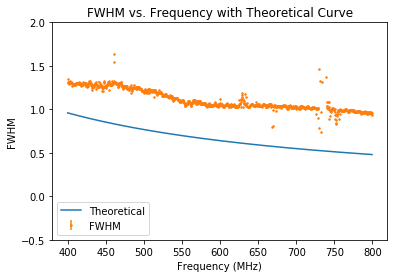

In [16]:
#Plot beamwidth against theoretical curve
plt.plot(freq_axis, FWHM_theory, label='Theoretical')
plt.errorbar(freq_axis, FWHM_exp, xerr=None, yerr=p_cov_all[2][2], ls='',marker='o',markersize=1.5, label='FWHM')
plt.ylim(-0.5,2)
plt.title('FWHM vs. Frequency with Theoretical Curve')
plt.xlabel('Frequency (MHz)')
plt.ylabel('FWHM')
plt.legend()
#plt.savefig('FWHM_theory.png')

[900.41215631 942.94116572 961.6048317  ... 441.04193952 447.72147025
 462.6401765 ]
1661.9025137490005
[0.54179601 0.56738657 0.57861687 ... 0.26538376 0.26940297 0.27837985]


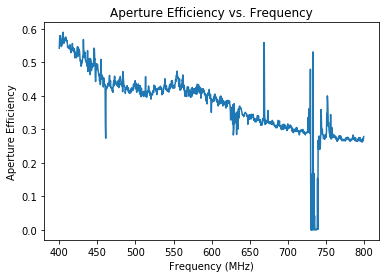

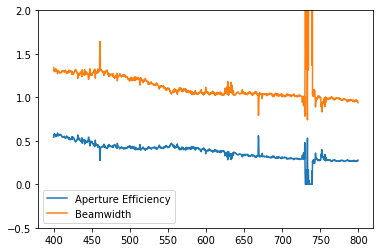

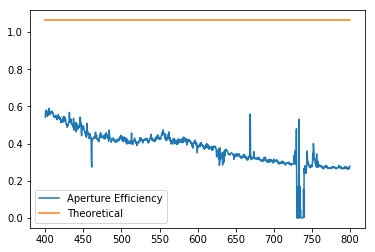

In [17]:
##Calculate aperture efficiency:
#Calculate solid angle
#Omega = ((np.pi/(4*np.log(2)))*FWHM_exp**2)*(np.pi/180)#Converted from degress to radians and looks higher but I don't know if this was the right correction
#print(Omega)

Omega = np.pi*(np.radians(FWHM_exp))**2/(4*np.log(2))#*(np.pi/180)

#Calculate collecting area (should be approx 1640m^2)
Ae = wavelength**2/Omega #Ae using lf for wavelength
print(Ae)

#Calculate geometric area of the telescope
A_geom = np.pi*(23**2)
print(A_geom)

#Calculate aperture efficiency
eta = Ae/A_geom
print(eta)

plt.errorbar(freq_axis, eta)
plt.title('Aperture Efficiency vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Aperture Efficiency')
#plt.savefig('aperture_efficiency.pdf')

plt.figure()
plt.errorbar(freq_axis, eta, label='Aperture Efficiency')
plt.errorbar(freq_axis, FWHM_exp, label='Beamwidth')
plt.legend()
plt.ylim(-0.5,2)

#Theoretical: instaed of FWHM, put in theoretical 
Omega_theory = np.pi*(np.radians(FWHM_theory))**2/(4*np.log(2))
Ae_theory = wavelength**2/Omega_theory
eta_theory = Ae_theory/A_geom

plt.figure()
plt.errorbar(freq_axis, eta, label='Aperture Efficiency')
plt.errorbar(freq_axis, eta_theory, label='Theoretical')
plt.legend()

In [18]:
#Fluxes according to paper cited in lab manual:
#550MHz = 5170Jy
#625MHz = 4670Jy
#710MHz = 4240Jy
#780MHz = 3870Jy
#Fluxes have dimmed roughly 50% in the last 40 years:
measured_freqs = np.array((550, 625, 710, 780))/1000000
#freq1 = np.full((49,), 550)
#freq2 = np.full((49,), 625)
#freq3 = np.full((49,), 710)
#freq4 = np.full((49,), 780)
#freq_array = np.stack((freq1, freq2, freq3, freq4), axis=0)
measured_flux_1977 = np.array((5170, 4670, 4240, 3870))*10e-26 #Convert from Jy to W/m^2Hz
measured_flux_now = measured_flux_1977/2
#Stokes_at_freqs = np.array((StokesI_CasA_ARO[:,149], StokesI_CasA_ARO[:,225], StokesI_CasA_ARO[:,310], StokesI_CasA_ARO[:,380]))
#Ae_1 = np.full((49,), Ae[149])
#Ae_2 = np.full((49,), Ae[225])
#Ae_3 = np.full((49,), Ae[310])
#Ae_4 = np.full((49,), Ae[380])
#Ae_array = np.stack((Ae_1, Ae_2, Ae_3, Ae_4), axis=0)
#power_Stokes = Stokes_at_freqs/Ae_array
Ae_at_freqs = np.array((Ae[149], Ae[225], Ae[310], Ae[380]))

#or
power_flux = measured_flux_now*Ae_at_freqs

#Calculate temperature
kB = 1.38*(10e-23)
#T = power_RJ/(kB*freq_array)

#Calculate theoretical temperature
T = power_flux/kB
print(T)

#Flux = Jy*.5, convert

[1412.3413697  1183.36783486 1030.17971111 1031.97171508]


In [19]:
#Calculate theoretical temperature for 625MHz = 4670Jy
flux_625 = (4670*10e-26)/2
Ae_625 = Ae[225]
power_625 = flux_625*Ae_625
T_625 = power_625/kB
print(T_625)

1183.3678348576864


In [20]:
#Calculate experimental temperature for 625MHz
Stokes_625 = StokesI_CasA_ARO[:,225]
exp_power_625 = Stokes_625*Ae_625
T_exp_625 = exp_power_625/kB
print(T_exp_625)

[2.36410783e+25 2.37695058e+25 2.36559204e+25 2.40000185e+25
 2.37700796e+25 2.39803534e+25 2.38723426e+25 2.44496185e+25
 2.42365285e+25 2.45503253e+25 2.49178980e+25 2.64968331e+25
 2.68942980e+25 3.64127069e+25 3.76631983e+25 3.65438027e+25
 3.63513825e+25 6.26582577e+25 6.53081251e+25 1.12195840e+26
 1.13188718e+26 1.16360343e+26 1.41950582e+26 1.34528826e+26
 1.28383047e+26 7.43352627e+25 6.17447896e+25 2.99820044e+25
 3.13755377e+25 3.32973896e+25 3.81613631e+25 3.75544218e+25
 3.64033627e+25 2.70376632e+25 2.69850620e+25 2.78728423e+25
 2.73072000e+25 2.64674190e+25 2.53161866e+25 2.54428922e+25
 2.53854810e+25 2.58055271e+25 2.54237773e+25 2.52739628e+25
 2.43521494e+25 2.45569410e+25 2.42508118e+25 2.35970376e+25
 2.41366385e+25]


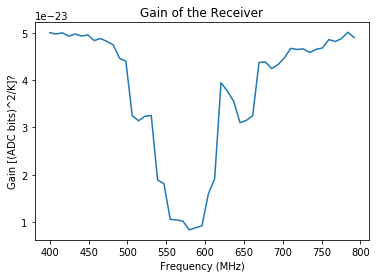

In [21]:
#Calculate gain
gain_ratio = T_625/T_exp_625 #gain is ratio of theoretical temperatures to experimental temperatures
gain_freq_axis = np.arange(400,800,400/49) #49 gain measurements
plt.plot(gain_freq_axis, gain_ratio)#is this right?  Seems really small
plt.title('Gain of the Receiver')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain [(ADC bits)^2/K]?')
plt.savefig('gain.pdf')

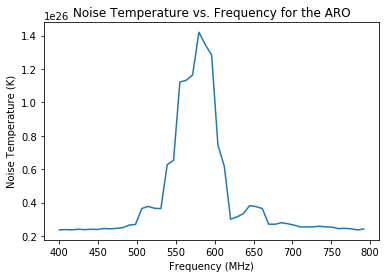

In [22]:
#Noise temperature of the receiver = background temperature - foreground temperature
noise_temp = T_exp_625 - 10
freq_axis_noise = np.arange(400,800,400/49)
plt.plot(freq_axis_noise, noise_temp) #is this right?  Seems really big
plt.xlabel('Frequency (MHz)')
plt.ylabel('Noise Temperature (K)')
plt.title('Noise Temperature vs. Frequency for the ARO')
plt.savefig('noise_temp.pdf')

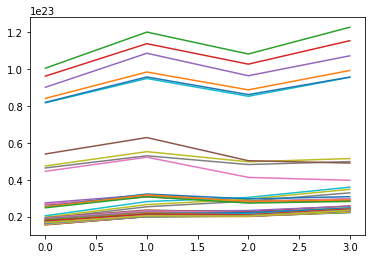

In [23]:
#Gain of receiver is equal to the factor that we would have to divide the Stokes I measurements by to get the 
#same value of flux as the reference value
Stokes_at_freqs = np.array((StokesI_CasA_ARO[:,149], StokesI_CasA_ARO[:,225], StokesI_CasA_ARO[:,310], StokesI_CasA_ARO[:,380]))
flux1 = np.full((49,), measured_flux_now[0])
flux2 = np.full((49,), measured_flux_now[1])
flux3 = np.full((49,), measured_flux_now[2])
flux4 = np.full((49,), measured_flux_now[3])
flux_array = np.stack((flux1, flux2, flux3, flux4), axis=0)
gain = Stokes_at_freqs/flux_array
plt.plot(gain)

In [201]:
#Pulsar header
data_file = open("AST326_ARO_B0329+54.dat", "rb")
header_fmt = '=iiiidiiiId'
header_length = 48
packed_header = data_file.read(header_length)
header_data = struct.unpack(header_fmt, packed_header)

print(header_data)

pkt_length = header_data[0]
pkt_header = header_data[1]
pkt_samples = header_data[2]
pkt_dtype =  header_data[3]
pkt_raw_cad = header_data[4]
pkt_freqs = header_data[5]
pkt_elems = header_data[6]
pkt_int_len = header_data[7]
pkt_idx0 = header_data[8]
pkt_utc0 = header_data[9]
print(pkt_header)

(4108, 12, 1024, 4, 2.56e-06, 1024, 1, 256, 256, 1470214478.3426828)
12


In [202]:
#Pulsar frequencies
info_header = data_file.read(pkt_freqs*4*2)
freq_list = np.frombuffer(info_header[:pkt_freqs*4*2], dtype=np.float32)
freq_list = freq_list.reshape(-1,2)
freqs = freq_list.mean(axis=1)
dt = pkt_raw_cad*pkt_int_len
elemlist = np.frombuffer(info_header[pkt_freqs*4*2:], dtype=np.uint8)
print(dt)
print(freqs)

0.00065536
[400.1953  400.58594 400.97656 ... 799.02344 799.41406 799.8047 ]


In [203]:
#Read pulsar data 
def read_pkt():
    global data_file
    data_header = data_file.read(pkt_header, dtype=np.float32)
    idx, az, alt = struct.unpack('Iff', data_header)
    data = np.frombuffer(data_file.read(pkt_length-pkt_header),dtype=np.float32) #can specify read start to stop 
    times[i] = idx
    els[i] = alt
    azs[i] = az
    data_m[i] = data
    return idx, az, alt, data

In [128]:
averages1 = []
for i in np.arange(16):
    averaged = []
    for i in np.arange(8192):
        dat = np.frombuffer(data_p.read(pkt_header),np.float32)
        time,el,az = struct.unpack("Iff",dat)
        datum = np.frombuffer(data_p.read(header["slice_len"][0]-header["head_len"][0]), np.float32)
        #times[i] = time
        #els[i] = el
        #azs[i] = az
        averaged.append(datum)
    averages1.append(np.asarray(averaged))

12

In [204]:
#counter = 0
#data_array = np.zeros((131072,1024))
#for i in range(counter, counter+10000):
    #a,b,c,d = read_pkt()
    #data_array[i] = d
    #counter += 10000
#print(data_array.shape)
#print(data_array)


#data = []
#for i in np.arange(10000):
    #a,b,c,d = read_pkt()
    #data.append(d)
#data = np.array(data)
#t = dt*np.arange(data.shape[0])

#print(data)

#test = 0
#data_test = []
#for i in range(test, test+10000):
    #a,b,c,d = read_pkt()
    #data_test.append(d)
    #test +=10000
#data_test = np.array(data_test)
#print(data_test.shape)
#print(data_test)

#counter = 10000
#data_list = []
#for i in range(counter, counter+10000):
    #a,b,c,d = read_pkt()
    #data_list.append(d)
    #counter +=10000
#data_list = np.array(data_list)
#print(data_list.shape)
#print(data_list)

#This one
#data_means = []
#avgs = np.zeros((134217, 1000)) 
#medians = np.zeros((134217, 1000))
#for j in np.arange(0, 2**17/1000, 1000): #round 2**17/1000 to integer or take the floor because not divisible
    #for i in range(j, j+1000):
        #a,b,c,d = read_pkt()
        #data_means.append(d)
        #data_means_array = np.array(data_means)
    #avgs[i,:] = np.mean(data_means_array[i,:])
    #medians[i,:] = np.median(data_means_array[i,:])
#print(avgs.shape)
#t = dt*np.arange(avgs.shape[0])
#print(t)
#print(avgs) #Average by time: rebin data 

data_list = [] 
for i in np.arange(16): 
    data_chunk = []
    for i in np.arange(8192): 
        data_header = np.frombuffer(data_file.read(pkt_header), dtype=np.float32)
        idx, az, alt = struct.unpack('Iff', data_header)
        data = np.frombuffer(data_file.read(pkt_length-pkt_header),dtype=np.float32)  
        data_chunk.append(data)
    data_list.append(np.array(data_chunk))  
data_array=np.zeros((8192,1024))
counter=2
for i in np.arange(counter):
    data_array = data_list[i] + data_array
avgs = data_array/counter
t = dt*np.arange(avgs.shape[0]) #Create time data

(8192, 1024)


In [211]:
print(avgs.shape[0])

8192


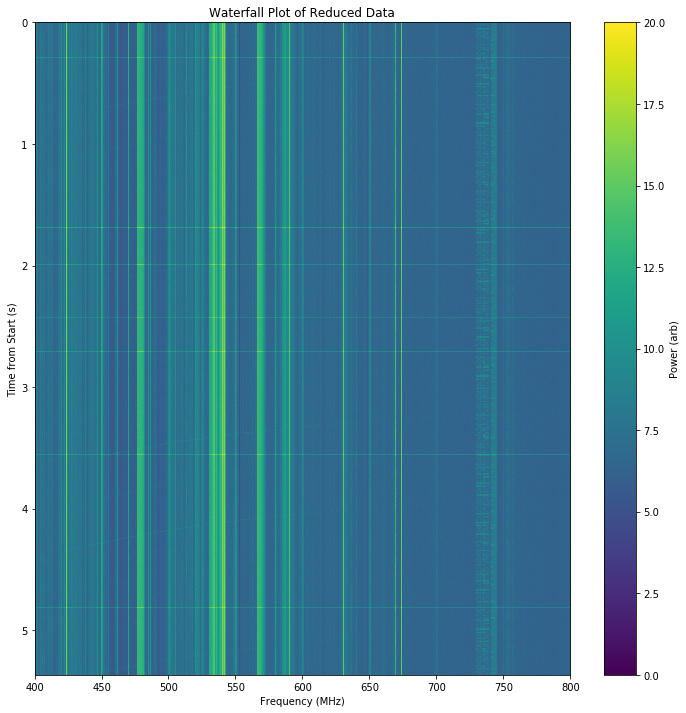

In [205]:
#Waterfall plot of averages
plt.figure(figsize=(12,12))
plt.imshow(10*np.log10(avgs),aspect="auto", extent=[400,800,np.amax(t), np.amin(t)], vmax=20, vmin=0)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time from Start (s)')
plt.title('Waterfall Plot of Reduced Data')
plt.colorbar().set_label('Power (arb)', rotation=90)

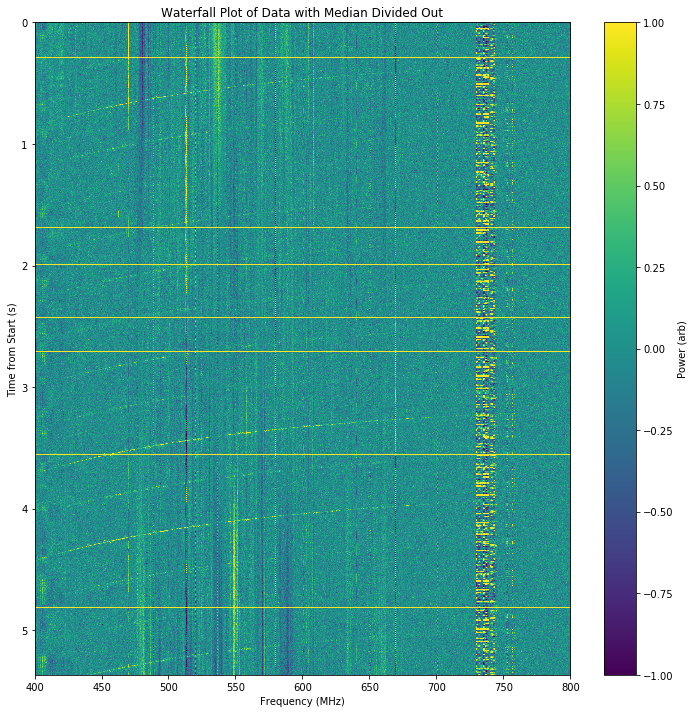

In [206]:
#Divide out RFI
median_RFI = np.median(avgs, axis=0)
min_RFI = np.min(avgs, axis = 0)

RFI_less = avgs/median_RFI[np.newaxis,:]
plt.figure(figsize=(12,12))
plt.imshow(10*np.log10(RFI_less), extent=[400,800,np.amax(t), np.amin(t)], aspect='auto', vmax=1, vmin=-1)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time from Start (s)')
plt.title('Waterfall Plot of Data with Median Divided Out')
plt.colorbar().set_label('Power (arb)', rotation=90)

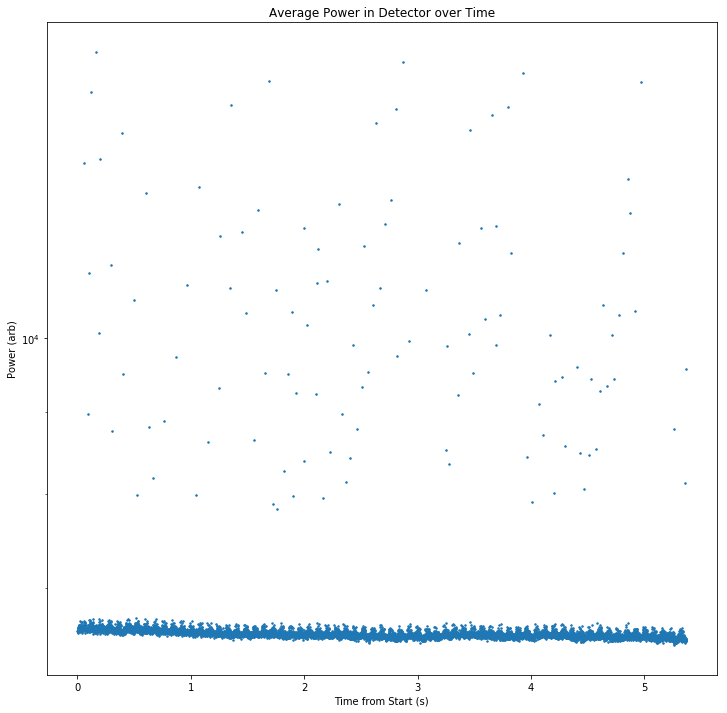

In [207]:
#Get rid of RFI
avgs_sum = np.sum(avgs, axis=1)
plt.figure(figsize=(12,12))
plt.plot(t, avgs_sum, ls='', marker = 'o', markersize = 1.5)
plt.semilogy()
#plt.ylim(0,7820)
plt.xlabel('Time from Start (s)')
plt.ylabel('Power (arb)')
plt.title('Average Power in Detector over Time')

large_values = np.where(avgs_sum > 7820)
period = 0.714519699726 #period

In [208]:
#Fold
freq_number = 1024
time_bins = 500
wfold = np.zeros([time_bins, freq_number])
cfold = np.zeros([time_bins, freq_number])

RFI_noise = large_values[0].tolist()
RFI_noise.append([0])
for i in np.arange(avgs.shape[0]):
    if i == RFI_noise[0]:
        RFI_noise.pop(0)
        continue
    phase = np.int(time_bins*np.modf(i*dt/period)[0])
    wfold[phase,:] += avgs[i,:] #Summing power
    cfold[phase,:] += 1 #How many pulses summing over 
print(wfold)
print(cfold)
#print(avgs.shape)
print(phase)
#print(np.where(wfold == 0))

[[ 88.62402344 130.08984375 123.45019531 ...  80.94921875  81.39648438
  486.14941406]
 [ 80.91015625 123.50292969 119.41015625 ...  76.78808594  77.04296875
  459.671875  ]
 [ 87.23632812 128.90625    123.125      ...  82.69824219  81.15917969
  485.89160156]
 ...
 [ 71.87988281 108.09667969 103.03222656 ...  67.83007812  68.16308594
  405.7578125 ]
 [ 77.30664062 117.65234375 110.94628906 ...  71.65917969  72.59375
  431.54980469]
 [ 70.66015625 109.91992188 105.38183594 ...  67.45996094  68.69042969
  405.76269531]]
[[18. 18. 18. ... 18. 18. 18.]
 [17. 17. 17. ... 17. 17. 17.]
 [18. 18. 18. ... 18. 18. 18.]
 ...
 [15. 15. 15. ... 15. 15. 15.]
 [16. 16. 16. ... 16. 16. 16.]
 [15. 15. 15. ... 15. 15. 15.]]
256


[[ 4.92355686  7.22721354  6.85834418 ...  4.49717882  4.52202691
  27.00830078]
 [ 4.75942096  7.26487822  7.02412684 ...  4.51694623  4.53193934
  27.03952206]
 [ 4.84646267  7.16145833  6.84027778 ...  4.59434679  4.50884332
  26.99397786]
 ...
 [ 4.79199219  7.20644531  6.8688151  ...  4.52200521  4.54420573
  27.05052083]
 [ 4.83166504  7.35327148  6.93414307 ...  4.47869873  4.53710938
  26.97186279]
 [ 4.71067708  7.32799479  7.02545573 ...  4.49733073  4.57936198
  27.05084635]]


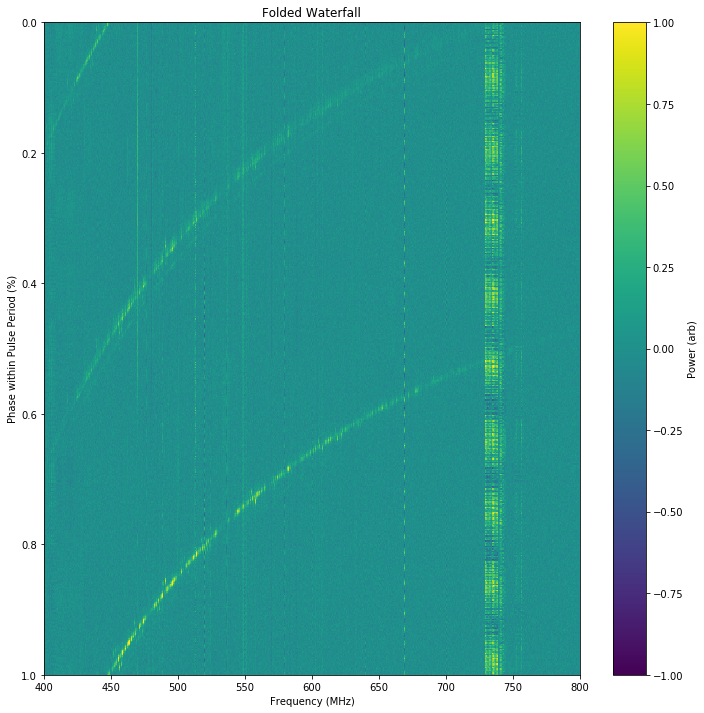

In [209]:
#Check fold
dd = wfold/cfold
medspec = np.median(avgs, axis=0)
dms = dd/medspec[np.newaxis,:]
print(dd)
plt.figure(figsize=(12,12))
plt.imshow(10*np.log10(dms), extent=[400,800,1, 0], aspect='auto', vmax=1, vmin=-1)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Phase within Pulse Period (%)')
plt.title('Folded Waterfall')
plt.colorbar().set_label('Power (arb)', rotation=90)

In [35]:
print(len(t))
print(dt)
print(len(freqs))
print(data.shape[1])
t_new = dt*np.arange(data.shape[1])
print(len(t_new))

10000
0.00065536
1024
1024
1024


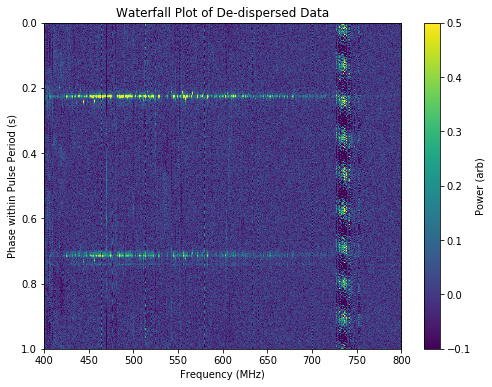

In [210]:
#De-disperse
k = 4.15e-3 #DM time prefactor
dm = 26.7641 #Looked up on ATNF - need to put into SI units? (It looks okay so I guess not?)
dispersion = (k*dm*(freqs/1000)**-2) 
ddms = dms*0
ddd = dd*0
for i in np.arange(freq_number):
    ddms[:,i] = np.roll(dms[:,i], -int(dispersion[i]/period*time_bins))
    ddd[:,i] = np.roll(dd[:,i], -int(dispersion[i]/period*time_bins))
    
dedispersed_data = ddms/np.median(ddms, axis=0)[np.newaxis,:]

plt.figure(figsize=(8,6))
plt.imshow(10*np.log10(dedispersed_data), extent = [np.amin(freqs), np.amax(freqs), 1, 0], aspect = 'auto', vmin = -.1, vmax = .5)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Phase within Pulse Period (s)')
plt.title('Waterfall Plot of De-dispersed Data')
plt.colorbar().set_label('Power (arb)', rotation=90)

In [74]:
print(dedispersed_data)
print(dedispersed_data.shape)

[[1.02431425 1.00324088 0.98539233 ... 0.99141019 1.00665357 0.99746866]
 [1.00542394 1.01110455 1.00464329 ... 0.99762904 1.01592218 0.99712896]
 [1.00167417 1.02392698 0.99392031 ... 0.99983496 1.00258191 0.99903914]
 ...
 [1.02124419 1.00191343 1.00899302 ... 1.00123511 1.0091715  1.00004168]
 [0.96453647 1.00879325 0.99469945 ... 0.9926751  0.98766166 1.00031347]
 [1.0066555  1.0079218  1.00771807 ... 0.99212277 0.99521432 1.00058013]]
(500, 1024)


In [75]:
dedispersed_array = np.ndarray.flatten(dedispersed_data)
print(dedispersed_array)

[1.02431425 1.00324088 0.98539233 ... 0.99212277 0.99521432 1.00058013]


In [79]:
dedispersed_data[0][0:50]

array([1.02431425, 1.00324088, 0.98539233, 1.0117932 , 1.01278941,
       1.00873398, 1.00150906, 0.98552633, 1.0068108 , 0.99922586,
       0.98975581, 0.99682709, 1.01547107, 0.99075769, 0.99067347,
       1.00896301, 1.00021802, 1.01073059, 1.01744235, 0.98160924,
       0.99877764, 0.98249425, 0.98468886, 0.97845136, 0.99574212,
       0.99978263, 1.02048979, 1.00178449, 0.99443936, 1.0014494 ,
       0.99585215, 0.99843763, 1.00409837, 1.00884744, 1.00411408,
       0.98727692, 1.00514422, 1.00519798, 1.0066675 , 0.99500605,
       0.99125223, 0.99341649, 1.00392205, 1.01158095, 0.96647341,
       1.00392004, 1.01492324, 0.97366156, 1.01921047, 1.00520499])

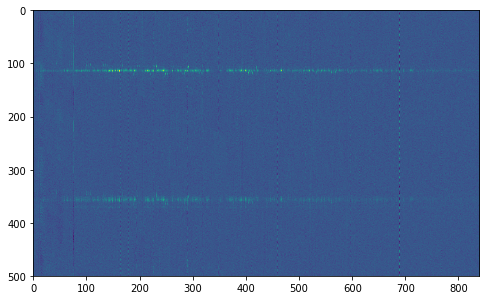

In [90]:
new_dat = []
hold = []
for i in np.arange(0,500):
    hold = list(dedispersed_data[i][0:840])
    new_dat.extend(hold)

new_array = np.array(new_dat)
new_ar_reshaped = new_array.reshape(500,840)
plt.figure(figsize=(8,6))
plt.imshow(10*np.log10(new_ar_reshaped))
    
#dat = np.zeros((500,870))
#for i in dedispersed_data:
    #dat[i] = dedispersed_data[:0,870]
#print(dat)

In [66]:
#Look at the profile
#print(dedispersed_data)
#print(dedispersed_data.shape)
#print(freqs[869])
profile_data = dedispersed_data[:0,870]
print(profile_data)
#profile = np.sum(profile_data) #Go to 870 to cut out LTE band
#print(profile)
#print(profile.shape)
#plt.figure(figsize=(8,6))
#plt.plot(profile)
#plt.title('Pulse Profile')
#plt.xlabel('Pulse Phase (fix this)')
#plt.ylabel('Flux Relative to Background (fix this)')

[1.02224236 1.02196486 1.00972773 1.03678934 1.04282705 1.05141776
 1.01117152 1.001334   0.97987974 0.9782311  1.00132574 0.99172063
 0.9813538  1.00523507 0.97739657 1.00272335 1.01920227 1.00253903
 0.9811055  1.00263077 1.01259784 0.99763602 0.97339919 1.0177251
 1.00232061 0.99764315 1.00695033 1.00529434 0.98461589 0.97049382
 1.01357397 0.9713256  0.98947306 0.99993558 1.02688808 1.02174455
 1.02233929 1.00002584 0.99626366 0.99992273 1.00080619 1.01359425
 0.97769833 0.98630419 1.01072944 0.99822921 1.00778162 0.97870224
 0.99411367 1.0133604  1.01269848 0.99069916 1.00522981 0.99721786
 0.99010667 0.99947258 1.01473489 1.0077647  0.99359303 1.01617944
 1.01236728 0.98754334 0.9884452  0.98438393 1.00457957 1.0118705
 1.00033405 1.01492346 1.01148692 0.99918177 1.00535435 1.0047594
 0.99424648 1.0131779  1.02024114 0.98741437 1.00258778 1.00458096
 1.00409581 1.01900002 0.99753895 0.98947123 0.99601558 1.0059841
 1.00655239 0.99606384 0.98939466 0.99735106 0.997755   1.0167141


KeyboardInterrupt: 

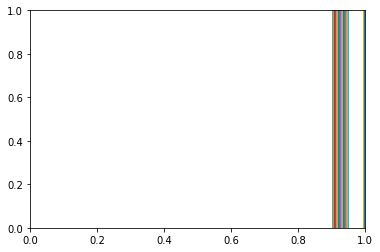

In [43]:
#Plot a histogram of pulse amplitude variation vs. time
plt.hist(dedispersed_data, bins=10)

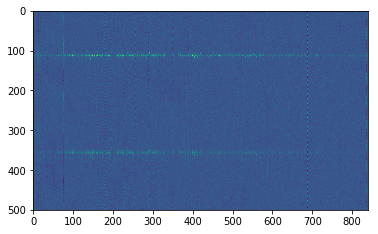

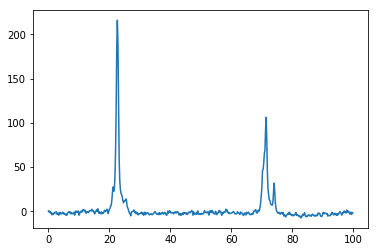

In [92]:
new_dat = []
hold = []
for i in np.arange(0,500):
    hold = list(dedispersed_data[i][0:840])
    new_dat.extend(hold)

new_array = np.array(new_dat)
new_ar_reshaped = new_array.reshape(500,840)
plt.figure()
plt.imshow(10*np.log10(new_ar_reshaped))

profile = np.sum(10*np.log10(new_ar_reshaped), axis=1)
plt.figure()
plt.plot(np.arange(0,100,100/500),profile)
#Average and gains